In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
import statistics
from functools import reduce
pd.set_option('display.max_rows', 100)

In [2]:
online_results = pickle.load(open("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/demand_initial_exploration-2020-06-12 02:16:39.637779+01:00.csv", "rb"))
# online_results = pickle.load(open("/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/data/results/demand_initial_exploration-2020-04-19 08-18-25.980790.csv", "rb"))



online_results

{'{"C": 0.1, "fit_intercept": true, "max_iter": 1, "shuffle": false, "tol": 0.001}': [[{'median_absolute_error': 7423.690230130251,
    'mean_squared_error': 280592024.0511837,
    'mean_absolute_error': 12346.327822366233,
    'root_mean_squared_error': 16750.88129177637,
    'training_time': 190.72555885187467,
    'testing_time': 26.801386877486948},
   {'median_absolute_error': 4335.171261485,
    'mean_squared_error': 154961008.3243053,
    'mean_absolute_error': 8215.928845008959,
    'root_mean_squared_error': 12448.333556115263,
    'training_time': 185.485129047418,
    'testing_time': 25.62021027575247},
   {'median_absolute_error': 3117.646986184798,
    'mean_squared_error': 106747284.88505365,
    'mean_absolute_error': 6278.122099922365,
    'root_mean_squared_error': 10331.85776542891,
    'training_time': 178.12034960318124,
    'testing_time': 25.881156817951705},
   {'median_absolute_error': 2664.357328224196,
    'mean_squared_error': 82706848.87095423,
    'mean_abs

In [3]:
results_df = pd.concat({key: pd.DataFrame(value) for key, value in online_results.items()}, axis=0)#.iloc[0,0]
results_df

0  \
{"C": 0.1, "fit_intercept": true, "max_iter": 1... 0   {'median_absolute_error': 7423.690230130251, '...   
                                                   1   {'median_absolute_error': 7379.767507512341, '...   
                                                   2   {'median_absolute_error': 7366.851764727166, '...   
                                                   3   {'median_absolute_error': 7343.025699795227, '...   
                                                   4   {'median_absolute_error': 7398.655239847318, '...   
...                                                                                                  ...   
{"hidden_layer_sizes": 10, "learning_rate": "ad... 19  {'median_absolute_error': 2241.7256079399813, ...   
                                                   20  {'median_absolute_error': 2196.3990017445976, ...   
                                                   21  {'median_absolute_error': 2155.93522223362, 'm...   
                                                   22  {'median_absolute_error': 2086.24089016347, 'm...   
                                                   23  {'median_absolute_error': 1996.5065309343518, ...   

                                                                                                       1  \
{"C": 0.1, "fit_intercept": true, "max_iter": 1... 0   {'median_absolute_error': 4335.171261485, 'mea...   
                                                   1   {'median_absolute_error': 4297.10372246378, 'm...   
                                                   2   {'median_absolute_error': 4256.533330999608, '...   
                                                   3   {'median_absolute_error': 4255.173199971614, '...   
                                                   4   {'median_absolute_error': 4289.384989455995, '...   
...                                                                                                  ...   
{"hidden_layer_sizes": 10, "learning_rate": "ad... 19  {'median_absolute_error': 2086.9798327644003, ...   
                                                   20  {'median_absolute_error': 2061.639356326965, '...   
                                                   21  {'median_absolute_error': 2021.952819220738, '...   
                                                   22  {'median_absolute_error': 1962.56643865986, 'm...   
                                                   23  {'median_absolute_error': 1904.2479862108412, ...   

                                                                                                       2  \
{"C": 0.1, "fit_intercept": true, "max_iter": 1... 0   {'median_absolute_error': 3117.646986184798, '...   
                                                   1   {'median_absolute_error': 3124.141099662971, '...   
                                                   2   {'median_absolute_error': 3090.789918594921, '...   
                                                   3   {'median_absolute_error': 3097.2734871385037, ...   
                                                   4   {'median_absolute_error': 3117.689629660308, '...   
...                                                                                                  ...   
{"hidden_layer_sizes": 10, "learning_rate": "ad... 19  {'median_absolute_error': 1992.0561285419572, ...   
                                                   20  {'median_absolute_error': 1980.5669028590492, ...   
                                                   21  {'median_absolute_error': 1941.2776097092647, ...   
                                                   22  {'median_absolute_error': 1873.8799124477846, ...   
                                                   23  {'median_absolute_error': 1818.8701891983292, ...   

                                                                                                       3  \
{"C": 0.1, "fit_intercept": true, "max_iter": 1... 0   {'median_absolute_error': 2664.357328224196, '...

In [4]:
def get_metrics(metric="mean_absolute_error"):
    result_edited = results_df.copy()
    for i in range(len(results_df)):
        for j in range(len(results_df.columns)):
            result_edited.iloc[i,j] = results_df.iloc[i,j][metric]
    result_edited = result_edited.apply(pd.to_numeric, errors='coerce')
    result_edited = result_edited.reset_index().groupby("level_0")[list(range(20))].mean()
    result_edited = result_edited.reset_index().melt(id_vars="level_0")
    result_edited = result_edited.rename(columns={"value":metric, "level_0":"Model parameters"})
    
    return result_edited

median_absolute_error_results = get_metrics("median_absolute_error")
mean_absolute_error_results = get_metrics("mean_absolute_error")
training_time_results = get_metrics("training_time")
testing_time_results = get_metrics("testing_time")

testing_time_results


,Model parameters,variable,testing_time
0,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",0,26.248149
1,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",0,26.223994
2,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ...",0,24.782762
3,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ...",0,24.147499
4,"{""C"": 2, ""fit_intercept"": false, ""max_iter"": 1...",0,23.572594
...,...,...,...
215,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 1,...",19,7.657064
216,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",19,10.608085
217,"{""hidden_layer_sizes"": 10, ""learning_rate"": ""a...",19,6.650295
218,"{""power"": 0.1}",19,4.878133


In [5]:
all_results = testing_time_results.merge(training_time_results, on=["Model parameters", 'variable']).merge(mean_absolute_error_results, on=["Model parameters", 'variable'])
all_results


,Model parameters,variable,testing_time,training_time,mean_absolute_error
0,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",0,26.248149,185.865077,15245.056222
1,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",0,26.223994,186.727080,15245.056222
2,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ...",0,24.782762,174.860139,12446.265425
3,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ...",0,24.147499,170.104155,12446.265425
4,"{""C"": 2, ""fit_intercept"": false, ""max_iter"": 1...",0,23.572594,167.609813,1940.910440
...,...,...,...,...,...
215,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 1,...",19,7.657064,124.961575,1904.097601
216,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",19,10.608085,137.478386,1904.097601
217,"{""hidden_layer_sizes"": 10, ""learning_rate"": ""a...",19,6.650295,72.458306,1989.046421
218,"{""power"": 0.1}",19,4.878133,38.633419,1172.587521


In [6]:
# all_results['Model parameters'] = np.where(all_results['Model parameters'].str.contains("hidden_layer_"),'(MLP): ' + all_results['Model parameters'], all_results['Model parameters'])
# all_results['Model parameters'] = np.where(all_results['Model parameters'].str.contains("C ="),'(PA): ' + all_results['Model parameters'], all_results['Model parameters'])
# all_results['Model parameters'] = np.where(all_results['Model parameters'].str.contains("power"),'(Box Cox): ' + all_results['Model parameters'], all_results['Model parameters'])
# # all_results['Model parameters'].iloc[6] = "Linear Regression"
# all_results['Model parameters'] = np.where(all_results['Model parameters'].str.contains("(MLP)"),'MLP (all parameter variations)', all_results['Model parameters'])



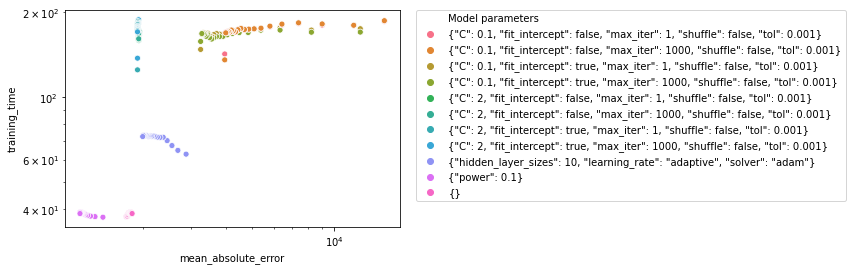

In [7]:
sns.scatterplot(data=all_results, x='mean_absolute_error', y="training_time", hue="Model parameters")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yscale('log')
plt.xscale('log')

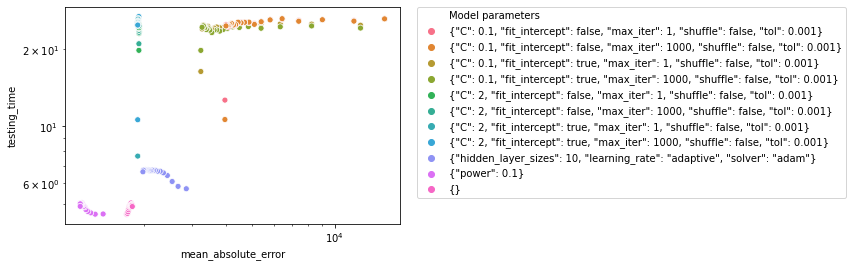

In [8]:
sns.scatterplot(data=all_results, x='mean_absolute_error', y="testing_time", hue="Model parameters")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.yscale('log')
plt.xscale('log')

In [9]:
testing_time = get_metrics('testing_time')
training_time = get_metrics('training_time')
root_mean_squared_error = get_metrics('root_mean_squared_error')
mean_absolute_error = get_metrics('mean_absolute_error')
mean_squared_error = get_metrics('mean_squared_error')
median_absolute_error = get_metrics('median_absolute_error')
mean_squared_error

,Model parameters,variable,mean_squared_error
0,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",0,4.193742e+08
1,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":...",0,4.193742e+08
2,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ...",0,2.817793e+08
3,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ...",0,2.817793e+08
4,"{""C"": 2, ""fit_intercept"": false, ""max_iter"": 1...",0,7.494846e+06
...,...,...,...
215,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 1,...",19,7.191443e+06
216,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10...",19,7.191443e+06
217,"{""hidden_layer_sizes"": 10, ""learning_rate"": ""a...",19,7.453651e+06
218,"{""power"": 0.1}",19,2.763473e+06


In [10]:
metrics_df = [testing_time, training_time, root_mean_squared_error, mean_absolute_error, mean_squared_error, median_absolute_error]
metrics_merged = pd.concat(metrics_df, join='outer', axis=1)
metrics_results = metrics_merged[['testing_time', 'training_time', 'root_mean_squared_error', 'mean_absolute_error', 'mean_squared_error']]

metrics_results['estimator'] = metrics_merged.iloc[:,0]
metrics_results

<ipython-input-10-a032a44612a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_results['estimator'] = metrics_merged.iloc[:,0]


,testing_time,training_time,root_mean_squared_error,mean_absolute_error,mean_squared_error,estimator
0,26.248149,185.865077,20478.619449,15245.056222,4.193742e+08,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":..."
1,26.223994,186.727080,20478.619449,15245.056222,4.193742e+08,"{""C"": 0.1, ""fit_intercept"": false, ""max_iter"":..."
2,24.782762,174.860139,16786.238360,12446.265425,2.817793e+08,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
3,24.147499,170.104155,16786.238360,12446.265425,2.817793e+08,"{""C"": 0.1, ""fit_intercept"": true, ""max_iter"": ..."
4,23.572594,167.609813,2731.815125,1940.910440,7.494846e+06,"{""C"": 2, ""fit_intercept"": false, ""max_iter"": 1..."
...,...,...,...,...,...,...
215,7.657064,124.961575,2675.172724,1904.097601,7.191443e+06,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 1,..."
216,10.608085,137.478386,2675.172724,1904.097601,7.191443e+06,"{""C"": 2, ""fit_intercept"": true, ""max_iter"": 10..."
217,6.650295,72.458306,2728.037774,1989.046421,7.453651e+06,"{""hidden_layer_sizes"": 10, ""learning_rate"": ""a..."
218,4.878133,38.633419,1658.364736,1172.587521,2.763473e+06,"{""power"": 0.1}"


In [11]:
mean_metrics_results = metrics_results.groupby("estimator").apply(np.mean)
mean_metrics_results = mean_metrics_results.reset_index()
mean_metrics_results = mean_metrics_results.rename(columns={"estimator":"index"})
mean_metrics_results

mean_metrics_results['index'] = mean_metrics_results['index'].str.replace("_"," ").str.replace(":","=").str.replace('{',"").str.replace('"',"").str.replace("="," =").str.replace(", solver = adam}", "").str.replace(", max_iter = 1, shuffle = false, tol = 0.001","").str.replace("}","")
mean_metrics_results
mean_metrics_results['index'] = mean_metrics_results['index'].astype(str)
mean_metrics_results



mean_metrics_results['index'] = np.where(mean_metrics_results['index'].str.contains("hidden_layer_"),'(MLP) ' + mean_metrics_results['index'], mean_metrics_results['index'])
mean_metrics_results['index'] = np.where(mean_metrics_results['index'].str.contains("C ="),'(PA) ' + mean_metrics_results['index'], mean_metrics_results['index'])


mean_metrics_results['index'] = np.where(mean_metrics_results['index'].str.contains("power"),'(Box Cox) ' + mean_metrics_results['index'], mean_metrics_results['index'])
# mean_metrics_results['index'].iloc[6] = "Linear Regression"
mean_metrics_results['index'] = np.where(mean_metrics_results['index'].str.contains("hidden layer sizes"),'MLP (all parameter variations)', mean_metrics_results['index'])


mean_metrics_results.replace("", "Linear Regression", inplace=True)

# mean_metrics_results.dropna(subset = ["index"], inplace=True)
mean_metrics_results = mean_metrics_results.rename(columns = {"index":"Estimator", "testing_time":"Mean Score Time", "training_time": "Mean Fit Time", "root_mean_squared_error": "Mean RMSE", "mean_absolute_error": "Mean MAE", "mean_squared_error": "Mean MSE"})
mean_metrics_results = mean_metrics_results.round(2)

mean_metrics_results = mean_metrics_results.replace({", max iter = 1, shuffle = false, tol = 0.001":""}, regex=True)
mean_metrics_results = mean_metrics_results.replace({", max iter = 1000, shuffle = false, tol = 0.001":""}, regex=True)
mean_metrics_results = mean_metrics_results.drop_duplicates(subset="Estimator")

In [12]:
mean_metrics_results[['Estimator', 'Mean Fit Time', 'Mean Score Time', 'Mean MSE', "Mean RMSE", "Mean MAE"]].sort_index()

,Estimator,Mean Fit Time,Mean Score Time,Mean MSE,Mean RMSE,Mean MAE
0,"(PA) C = 0.1, fit intercept = false",173.47,24.72,1.030156e+08,9497.47,5888.40
2,"(PA) C = 0.1, fit intercept = true",168.66,24.07,6.320178e+07,7430.63,4605.94
4,"(PA) C = 2, fit intercept = false",165.23,23.75,7.451087e+06,2723.25,1927.33
6,"(PA) C = 2, fit intercept = true",174.91,24.65,7.223163e+06,2681.20,1907.59
8,MLP (all parameter variations),71.36,6.58,9.612351e+06,3076.77,2221.48
9,(Box Cox) power = 0.1,38.61,4.88,2.921935e+06,1703.79,1214.95
10,Linear Regression,38.61,4.85,5.629651e+06,2368.30,1785.02


In [13]:
mean_metrics_results[['Estimator', 'Mean Fit Time', 'Mean Score Time', 'Mean MSE', "Mean RMSE", "Mean MAE"]].sort_index().set_index('Estimator').to_csv("data/online_error_metrics.csv")



In [26]:
results_df_transposed_long = mean_metrics_results.melt(id_vars="Estimator", value_vars="Mean MAE").reset_index()
results_df_transposed_long = results_df_transposed_long.append({"index":7.0, "Estimator":"Extra Trees (Best offline)", "variable":"Mean MAE", "value": 1790.249721}, ignore_index=True)
results_df_transposed_long

,index,Estimator,variable,value
0,0.0,"(PA) C = 0.1, fit intercept = false",Mean MAE,5888.400000
1,1.0,"(PA) C = 0.1, fit intercept = true",Mean MAE,4605.940000
2,2.0,"(PA) C = 2, fit intercept = false",Mean MAE,1927.330000
3,3.0,"(PA) C = 2, fit intercept = true",Mean MAE,1907.590000
4,4.0,MLP (all parameter variations),Mean MAE,2221.480000
5,5.0,(Box Cox) power = 0.1,Mean MAE,1214.950000
6,6.0,Linear Regression,Mean MAE,1785.020000
7,7.0,Extra Trees (Best offline),Mean MAE,1790.249721


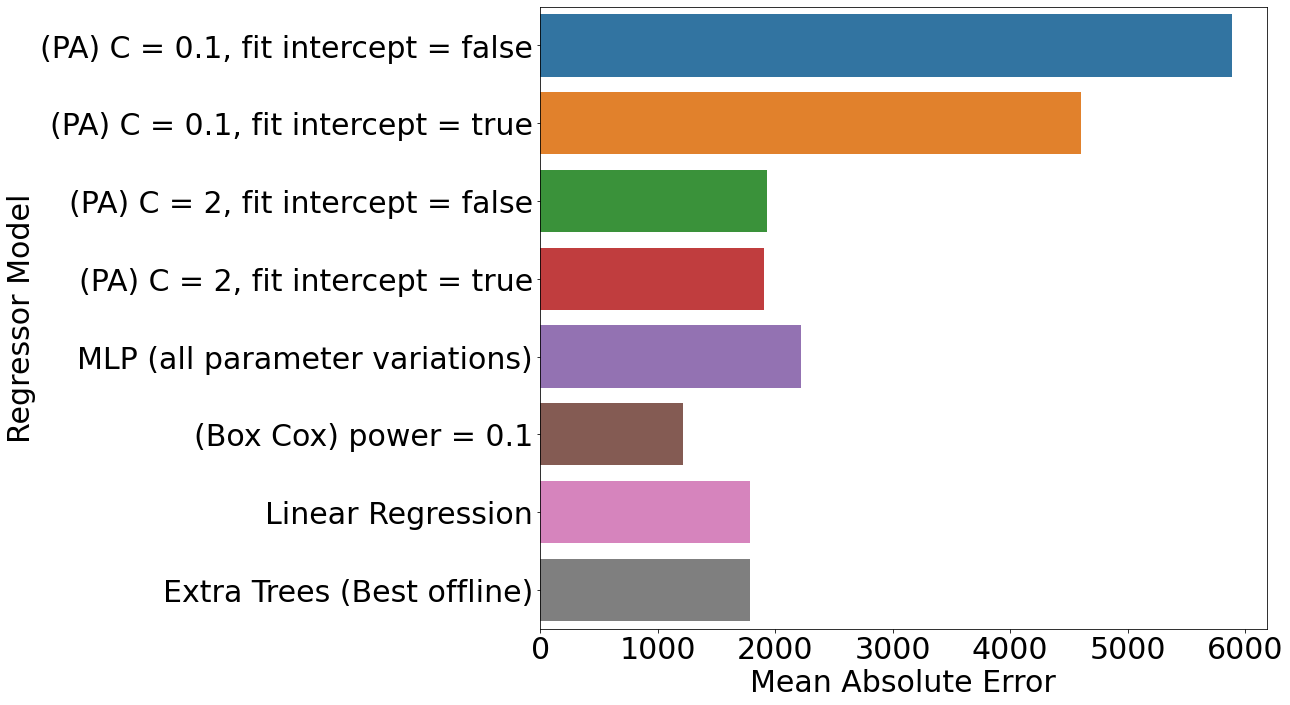

In [27]:
fig = plt.gcf()
plt.rcParams.update({'font.size': 30})

fig.set_size_inches(18.5, 10.5, forward=True)
g = sns.barplot(data=results_df_transposed_long, y='Estimator', x='value')
# lgd = ax.legend(bbox_to_anchor=(1.05, -0.17));
plt.xlabel("Mean Absolute Error")
plt.ylabel("Regressor Model")
plt.tight_layout()
plt.savefig('/Users/alexanderkell/Documents/PhD/Projects/10-ELECSIM/run/market_forecasting_comparison/notebooks/figures/online_model_mae_barplot.eps', dpi=1000)
plt.show()
plt.close()